In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv("./data/MM001BD_3_Trial1.txt", skiprows=lambda x: x < 17 or x == 18, sep='\t')

In [28]:
df

,abs time (s),Fx,Fy,Fz
0,0.000,18.053655,-4.172687,745.509541
1,0.001,18.373541,-4.172687,745.509541
2,0.002,18.372047,-3.854045,750.348350
3,0.003,18.134000,-4.014368,745.162356
4,0.004,18.292199,-3.854045,750.697163
...,...,...,...,...
19995,19.995,8.368607,-0.127181,772.471409
19996,19.996,7.652972,-0.445155,764.510088
19997,19.997,8.131059,-0.523981,768.310787
19998,19.998,8.052208,-0.363657,767.972676


In [82]:
df['force_magnitude'] = np.sqrt(np.square(df.Fx) + np.square(df.Fy) + np.square(df.Fz))
df['force_gradient'] = np.gradient(df['force_magnitude'].rolling(center=False,window=4).sum())

In [83]:
maxForce= df.force_magnitude.max()
maxForceAt = df.force_magnitude.idxmax()
maxForceRow = df.iloc[maxForceAt]


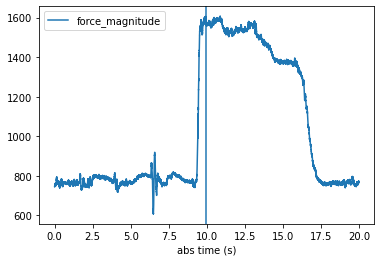

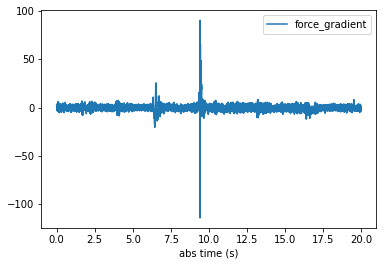

In [84]:
df.plot(kind = "line", x='abs time (s)', y='force_magnitude')
plt.axvline(x=maxFzRow['abs time (s)'])
df.plot(kind = "line", x='abs time (s)', y='force_gradient')
plt.show()

In [73]:
df['force_magnitude'] = np.sqrt(np.square(df.Fx) + np.square(df.Fy) + np.square(df.Fz))
df.force_magnitude.max()

1606.7341974382816

In [85]:
df.force_gradient.max()

90.54465745758625

In [99]:

data = {"input_filename": ["asdf"], "max_force": [100]}
out_df = pd.DataFrame.from_dict(data)
out_df

,input_filename,max_force
0,asdf,100


In [133]:
from os import listdir
from os.path import isfile, join

In [135]:
data_dir = 'data'
onlyfiles = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f))]
onlyfiles

['data/MM001BD_3_Trial1.txt',
 'data/MM001BD_3_Trial2.txt',
 'data/MM001BD_3_Trial3.txt']

In [144]:
def process_data_file(filename):
    print "Processing file: " + filename
    df = pd.read_csv(filename, skiprows=lambda x: x < 17 or x == 18, sep='\t')
    df['force_magnitude'] = np.sqrt(np.square(df.Fx) + np.square(df.Fy) + np.square(df.Fz))
    df['force_gradient'] = np.gradient(df['force_magnitude'].rolling(center=False,window=4).sum())
    max_force= df.force_magnitude.max()
    max_gradient= df.force_gradient.max()

    return [filename, max_force, max_gradient]

In [145]:
output = np.array(list(map(lambda filename: process_data_file(filename), onlyfiles)))
output

array([['data/MM001BD_3_Trial1.txt', '1606.7341974382816',
        '90.54465745758625'],
       ['data/MM001BD_3_Trial2.txt', '1570.7343341151043',
        '99.43976298244843'],
       ['data/MM001BD_3_Trial3.txt', '1572.3137108000317',
        '96.23805268670162']], dtype='<U25')

In [148]:
out_df = pd.DataFrame(data=output, columns=['input_filename', 'max_force', 'max_gradient'])

In [149]:
out_df.to_csv("out.csv")

In [153]:
from os import walk
for path, subdirs, files in walk("data"):
    for name in files:
        print (join(path, name))

data/MM001BD_3_Trial1.txt
data/MM001BD_3_Trial2.txt
data/MM001BD_3_Trial3.txt
data/data2/MM001BD_3_Trial1.txt
data/data2/MM001BD_3_Trial2.txt
data/data2/MM001BD_3_Trial3.txt
